In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
from math import factorial as ft 
import plotly.express as px
plt.style.use('ggplot')

In [2]:
df_demo = pd.read_excel('/Users/admin/Desktop/GitHub/new_repos/jackson-heights-analysis/jackson_heights_analysis.xlsx', sheet_name='demographics')
df_rent = pd.read_excel('/Users/admin/Desktop/GitHub/new_repos/jackson-heights-analysis/jackson_heights_analysis.xlsx', sheet_name='rent')
df_value = pd.read_excel('/Users/admin/Desktop/GitHub/new_repos/jackson-heights-analysis/jackson_heights_analysis.xlsx', sheet_name='value')
df_edu_inc = pd.read_excel('/Users/admin/Desktop/GitHub/new_repos/jackson-heights-analysis/jackson_heights_analysis.xlsx', sheet_name='education_income')


In [3]:
display(df_demo.head())
df_demo.info()

,year,occupied_units,available_units,population,minor_children,other_members,foreign_members,professional_head,managerial_head,owner_head,...,public_service_head,clerical_head,blue_collar_head,professional_other,managerial_other,owner_other,sales_other,public_service_other,clerical_other,blue_collar_other
0,1920,88,100,273,25,23,19,0.33,0.18,0.08,...,0.05,0.05,0.11,0.21,0.03,0.1,0.14,0.03,0.18,0.31
1,1930,86,100,230,33,18,24,0.28,0.15,0.09,...,0.08,0.15,0.09,0.16,0.05,0.0,0.08,0.21,0.29,0.21
2,1940,82,100,198,15,18,23,0.26,0.14,0.01,...,0.01,0.13,0.20,0.20,0.05,0.0,0.10,0.08,0.32,0.25
3,1950,100,100,184,7,14,22,0.30,0.09,0.00,...,0.05,0.21,0.23,0.12,0.05,0.0,0.05,0.08,0.58,0.12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  4 non-null      int64  
 1   occupied_units        4 non-null      int64  
 2   available_units       4 non-null      int64  
 3   population            4 non-null      int64  
 4   minor_children        4 non-null      int64  
 5   other_members         4 non-null      int64  
 6   foreign_members       4 non-null      int64  
 7   professional_head     4 non-null      float64
 8   managerial_head       4 non-null      float64
 9   owner_head            4 non-null      float64
 10  sales_head            4 non-null      float64
 11  public_service_head   4 non-null      float64
 12  clerical_head         4 non-null      float64
 13  blue_collar_head      4 non-null      float64
 14  professional_other    4 non-null      float64
 15  managerial_other      4 non

In [4]:
display(df_rent.head())
df_rent.info()

,year,rent_less_30,rent_30_34,rent_35_39,rent_40_44,rent_45_49,rent_50_54,rent_55_59,rent_60_64,rent_65_69,rent_70_84,rent_85_100,rent_80_84,rent_greater_100,rent_unknown
0,1930,NaN,NaN,NaN,7,NaN,NaN,1,1,4,6,2,NaN,1.0,NaN
1,1940,7.0,3.0,1.0,2,14.0,18.0,13,9,11,2,1,NaN,NaN,2.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              2 non-null      int64  
 1   rent_less_30      1 non-null      float64
 2   rent_30_34        1 non-null      float64
 3   rent_35_39        1 non-null      float64
 4   rent_40_44        2 non-null      int64  
 5   rent_45_49        1 non-null      float64
 6   rent_50_54        1 non-null      float64
 7   rent_55_59        2 non-null      int64  
 8   rent_60_64        2 non-null      int64  
 9   rent_65_69        2 non-null      int64  
 10  rent_70_84        2 non-null      int64  
 11  rent_85_100       2 non-null      int64  
 12  rent_80_84        0 non-null      float64
 13  rent_greater_100  1 non-null      float64
 14  rent_unknown      1 non-null      float64
dtypes: float64(8), int64(7)
memory usage: 372.0 bytes


In [5]:
df_rent = df_rent.fillna(0)
df_rent = df_rent.astype(int)
display(df_rent.head())

,year,rent_less_30,rent_30_34,rent_35_39,rent_40_44,rent_45_49,rent_50_54,rent_55_59,rent_60_64,rent_65_69,rent_70_84,rent_85_100,rent_80_84,rent_greater_100,rent_unknown
0,1930,0,0,0,7,0,0,1,1,4,6,2,0,1,0
1,1940,7,3,1,2,14,18,13,9,11,2,1,0,0,2


In [6]:
display(df_value.head())
df_value.info()

,year,value_2500,value_3000,value_3500,value_3500_2,value_4000,value_4500,value_5000,value_5500,value_6000,value_6500,value_7000,value_7500,value_8000
0,1940,5,5,14,3,6,7,2,7,5,5,5,2,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   year          1 non-null      int64
 1   value_2500    1 non-null      int64
 2   value_3000    1 non-null      int64
 3   value_3500    1 non-null      int64
 4   value_3500_2  1 non-null      int64
 5   value_4000    1 non-null      int64
 6   value_4500    1 non-null      int64
 7   value_5000    1 non-null      int64
 8   value_5500    1 non-null      int64
 9   value_6000    1 non-null      int64
 10  value_6500    1 non-null      int64
 11  value_7000    1 non-null      int64
 12  value_7500    1 non-null      int64
 13  value_8000    1 non-null      int64
dtypes: int64(14)
memory usage: 244.0 bytes


In [7]:
display(df_edu_inc.head())
df_edu_inc.info()

,who,eight_or_less,some_high_school,completed_high_school,some_college,completed_college,post_graduate,less_1000_income,1000_1999_income,2000_2499_income,2500_2999_income,3000_3499_income,3500_3999_income,4000_4499_income,4500_4999_income,5000_5499_income,unknown_other_income
0,head,14,8,37,7,20,4,2,22,15,9.0,4,1.0,4.0,4.0,5,16
1,other,32,22,46,13,17,1,16,13,4,NaN,1,NaN,NaN,NaN,2,xx


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   who                    2 non-null      object 
 1   eight_or_less          2 non-null      int64  
 2   some_high_school       2 non-null      int64  
 3   completed_high_school  2 non-null      int64  
 4   some_college           2 non-null      int64  
 5   completed_college      2 non-null      int64  
 6   post_graduate          2 non-null      int64  
 7   less_1000_income       2 non-null      int64  
 8   1000_1999_income       2 non-null      int64  
 9   2000_2499_income       2 non-null      int64  
 10  2500_2999_income       1 non-null      float64
 11  3000_3499_income       2 non-null      int64  
 12  3500_3999_income       1 non-null      float64
 13  4000_4499_income       1 non-null      float64
 14  4500_4999_income       1 non-null      float64
 15  5000_5499_

In [8]:
df_edu_inc = df_edu_inc.fillna(0)
df_edu_inc['unknown_other_income'] = df_edu_inc['unknown_other_income'].where((df_edu_inc['unknown_other_income']!= 'xx') , 0)
df_edu_inc['2500_2999_income'] = df_edu_inc['2500_2999_income'].astype(int)
df_edu_inc['3500_3999_income'] = df_edu_inc['3500_3999_income'].astype(int)
df_edu_inc['4000_4499_income'] = df_edu_inc['4000_4499_income'].astype(int)
df_edu_inc['4500_4999_income'] = df_edu_inc['4500_4999_income'].astype(int)
df_edu_inc['unknown_other_income'] = df_edu_inc['unknown_other_income'].astype(int)
display(df_edu_inc.head())
df_edu_inc.info()


,who,eight_or_less,some_high_school,completed_high_school,some_college,completed_college,post_graduate,less_1000_income,1000_1999_income,2000_2499_income,2500_2999_income,3000_3499_income,3500_3999_income,4000_4499_income,4500_4999_income,5000_5499_income,unknown_other_income
0,head,14,8,37,7,20,4,2,22,15,9,4,1,4,4,5,16
1,other,32,22,46,13,17,1,16,13,4,0,1,0,0,0,2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   who                    2 non-null      object
 1   eight_or_less          2 non-null      int64 
 2   some_high_school       2 non-null      int64 
 3   completed_high_school  2 non-null      int64 
 4   some_college           2 non-null      int64 
 5   completed_college      2 non-null      int64 
 6   post_graduate          2 non-null      int64 
 7   less_1000_income       2 non-null      int64 
 8   1000_1999_income       2 non-null      int64 
 9   2000_2499_income       2 non-null      int64 
 10  2500_2999_income       2 non-null      int64 
 11  3000_3499_income       2 non-null      int64 
 12  3500_3999_income       2 non-null      int64 
 13  4000_4499_income       2 non-null      int64 
 14  4500_4999_income       2 non-null      int64 
 15  5000_5499_income       2 no

In [9]:
display(df_demo)

,year,occupied_units,available_units,population,minor_children,other_members,foreign_members,professional_head,managerial_head,owner_head,...,public_service_head,clerical_head,blue_collar_head,professional_other,managerial_other,owner_other,sales_other,public_service_other,clerical_other,blue_collar_other
0,1920,88,100,273,25,23,19,0.33,0.18,0.08,...,0.05,0.05,0.11,0.21,0.03,0.1,0.14,0.03,0.18,0.31
1,1930,86,100,230,33,18,24,0.28,0.15,0.09,...,0.08,0.15,0.09,0.16,0.05,0.0,0.08,0.21,0.29,0.21
2,1940,82,100,198,15,18,23,0.26,0.14,0.01,...,0.01,0.13,0.20,0.20,0.05,0.0,0.10,0.08,0.32,0.25
3,1950,100,100,184,7,14,22,0.30,0.09,0.00,...,0.05,0.21,0.23,0.12,0.05,0.0,0.05,0.08,0.58,0.12


In [10]:
df_demo['pop_density'] = df_demo['population'] / df_demo['occupied_units']
df_demo['total_non_heads'] = df_demo['minor_children'] + df_demo['other_members'] + df_demo['foreign_members']
df_demo['minor_percent'] = (df_demo['minor_children'] / df_demo['population']) * 100
df_demo['other_percent'] = (df_demo['other_members'] / df_demo['population']) * 100
df_demo['foreign_percent'] = (df_demo['foreign_members'] / df_demo['population']) * 100
df_demo['non_head_percent'] = (df_demo['total_non_heads'] / df_demo['population']) * 100

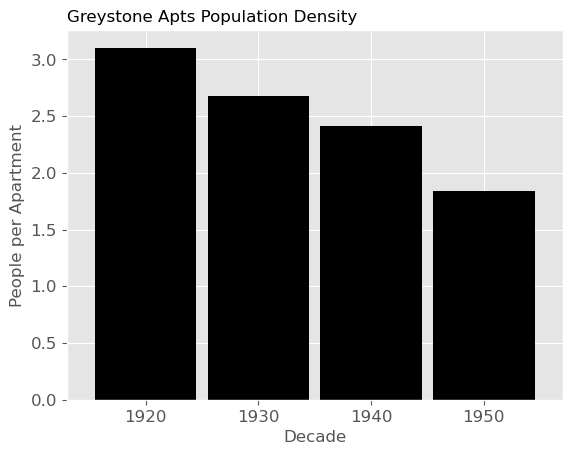

In [11]:
df_demo.plot(kind='bar',
             x='year',
             y='pop_density',
             color='black',
             width=0.9,
             legend=False)
#plt.legend().remove()
plt.title(label='Greystone Apts Population Density', fontsize=12, loc='left')
plt.xlabel('Decade', fontsize=12)
plt.ylabel('People per Apartment', fontsize=12)
plt.xticks(rotation=360, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

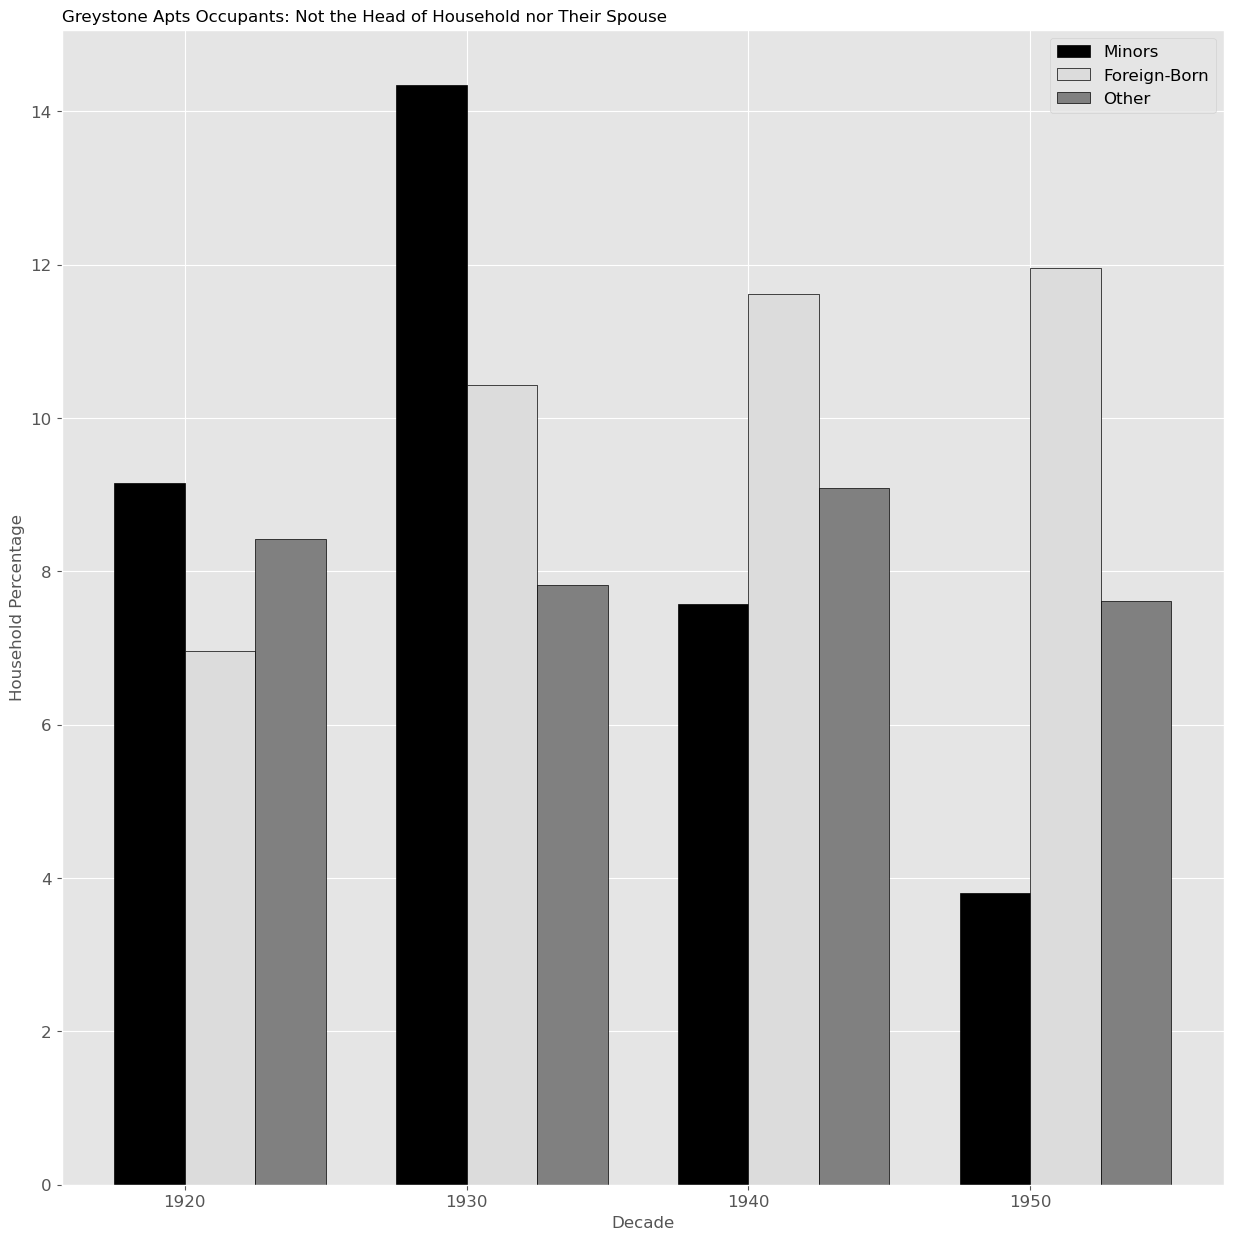

In [42]:
df_demo_percentages = df_demo.groupby(['minor_percent', 'other_percent', 'foreign_percent', 'non_head_percent'])['year'].max().sort_values(ascending=True)
df_demo_percentages = df_demo_percentages.reset_index().rename(columns={0: 'minor_percent', 1: 'other_percent', 2: 'foreign_percent', 3: 'non_head_percent', 'year': 'year'})
#display(df_demo_percentages)
n=4
r = np.arange(n) 
width = 0.25
plt.figure(figsize=(15, 15))
plt.bar(r, df_demo_percentages['minor_percent'], color = 'black', 
        width = width, edgecolor = 'black', 
        label='Minors')

plt.bar(r + width, df_demo_percentages['foreign_percent'], color = 'gainsboro', 
        width = width, edgecolor = 'black', 
        label='Foreign-Born')

plt.bar(r + width*2, df_demo_percentages['other_percent'], color = 'gray', 
        width = width, edgecolor = 'black', 
        label='Other')



'''plt.bar(r + width*3, df_demo_percentages['non_head_percent'], color = 'r', 
        width = width, edgecolor = 'black', 
        label='Total Percent of Household Who Were Not Household Head')'''

plt.xlabel('Decade', fontsize=12) 
plt.ylabel('Household Percentage', fontsize=12) 
plt.title(label='Greystone Apts Occupants: Not the Head of Household nor Their Spouse', fontsize=12, loc='left') 

  
# plt.grid(linestyle='--') 
plt.xticks(r + width/2,['1920', '1930', '1940', '1950'], fontsize=12) 
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=12)
  
plt.show()   

In [13]:
display(df_demo)

,year,occupied_units,available_units,population,minor_children,other_members,foreign_members,professional_head,managerial_head,owner_head,...,sales_other,public_service_other,clerical_other,blue_collar_other,pop_density,total_non_heads,minor_percent,other_percent,foreign_percent,non_head_percent
0,1920,88,100,273,25,23,19,0.33,0.18,0.08,...,0.14,0.03,0.18,0.31,3.102273,67,9.157509,8.424908,6.959707,24.542125
1,1930,86,100,230,33,18,24,0.28,0.15,0.09,...,0.08,0.21,0.29,0.21,2.674419,75,14.347826,7.826087,10.434783,32.608696
2,1940,82,100,198,15,18,23,0.26,0.14,0.01,...,0.10,0.08,0.32,0.25,2.414634,56,7.575758,9.090909,11.616162,28.282828
3,1950,100,100,184,7,14,22,0.30,0.09,0.00,...,0.05,0.08,0.58,0.12,1.840000,43,3.804348,7.608696,11.956522,23.369565


In [14]:
def occupation_sum(column, new_column):
    df_demo[new_column] = round(df_demo[column] * df_demo['population'])
    df_demo[new_column] = df_demo[new_column].astype(int)
    return df_demo[new_column]

In [15]:
occupation_sum('professional_head', 'num_prof_head')
occupation_sum('managerial_head', 'num_manage_head')
occupation_sum('owner_head', 'num_owner_head')
occupation_sum('sales_head', 'num_sales_head')
occupation_sum('public_service_head', 'num_public_service_head')
occupation_sum('clerical_head', 'num_clerical_head')
occupation_sum('blue_collar_head', 'num_blue_collar_head')

occupation_sum('managerial_other', 'num_manage_other')
occupation_sum('owner_other', 'num_owner_other')
occupation_sum('public_service_other', 'num_pub_serv_other')
occupation_sum('clerical_other', 'num_cler_other')
occupation_sum('blue_collar_other', 'num_blue_other')

0    85
1    48
2    50
3    22
Name: num_blue_other, dtype: int64

In [16]:
display(df_demo)
df_demo.info()

,year,occupied_units,available_units,population,minor_children,other_members,foreign_members,professional_head,managerial_head,owner_head,...,num_owner_head,num_sales_head,num_public_service_head,num_clerical_head,num_blue_collar_head,num_manage_other,num_owner_other,num_pub_serv_other,num_cler_other,num_blue_other
0,1920,88,100,273,25,23,19,0.33,0.18,0.08,...,22,52,14,14,30,8,27,8,49,85
1,1930,86,100,230,33,18,24,0.28,0.15,0.09,...,21,37,18,34,21,12,0,48,67,48
2,1940,82,100,198,15,18,23,0.26,0.14,0.01,...,2,32,2,26,40,10,0,16,63,50
3,1950,100,100,184,7,14,22,0.30,0.09,0.00,...,0,22,9,39,42,9,0,15,107,22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     4 non-null      int64  
 1   occupied_units           4 non-null      int64  
 2   available_units          4 non-null      int64  
 3   population               4 non-null      int64  
 4   minor_children           4 non-null      int64  
 5   other_members            4 non-null      int64  
 6   foreign_members          4 non-null      int64  
 7   professional_head        4 non-null      float64
 8   managerial_head          4 non-null      float64
 9   owner_head               4 non-null      float64
 10  sales_head               4 non-null      float64
 11  public_service_head      4 non-null      float64
 12  clerical_head            4 non-null      float64
 13  blue_collar_head         4 non-null      float64
 14  professional_other       4 non

,num_prof_head,num_manage_head,num_owner_head,num_sales_head,num_public_service_head,num_clerical_head,num_blue_collar_head,num_manage_other,num_owner_other,num_pub_serv_other,num_cler_other,num_blue_other,year
0,90,49,22,52,14,14,30,8,27,8,49,85,1920
1,64,34,21,37,18,34,21,12,0,48,67,48,1930
2,51,28,2,32,2,26,40,10,0,16,63,50,1940
3,55,17,0,22,9,39,42,9,0,15,107,22,1950


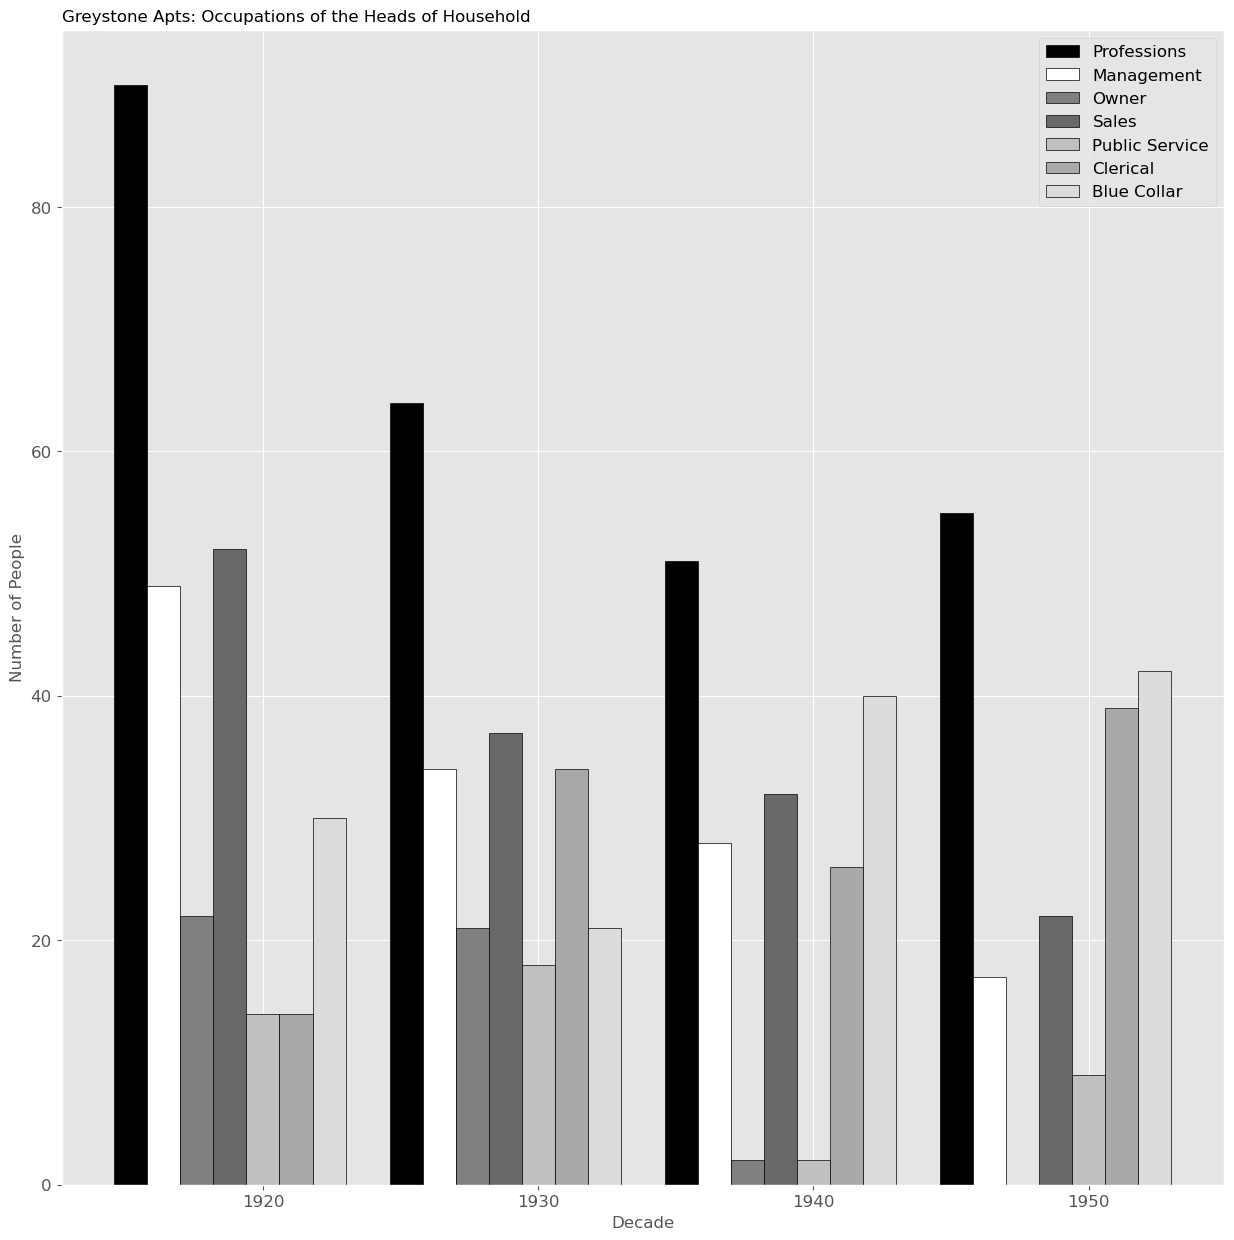

In [40]:
df_demo_numbers = df_demo.groupby(['num_prof_head', 'num_manage_head', 'num_owner_head', 'num_sales_head', 'num_public_service_head', 'num_clerical_head', 'num_blue_collar_head', 'num_manage_other', 'num_owner_other', 'num_pub_serv_other', 'num_cler_other', 'num_blue_other'])['year'].max().sort_values(ascending=True)
df_demo_numbers = df_demo_numbers.reset_index().rename(columns={0: 'num_prof_head', 1: 'num_manage_head', 2: 'num_owner_head', 3: 'num_manage_other', 4: 'num_owner_other', 5: 'num_pub_serv_other', 6: 'num_cler_other', 7: 'num_cler_other', 8: 'num_blue_other', 'year': 'year'})
display(df_demo_numbers)

n=4
r = np.arange(n) 
width = 0.12  # Reduce the width to create space between bars

plt.figure(figsize=(15, 15))

plt.bar(r - width * 3, df_demo_numbers['num_prof_head'],
        width=width, edgecolor='black', color='black',
        label='Professions')

plt.bar(r - width * 2, df_demo_numbers['num_manage_head'],
        width=width, edgecolor='black', color='white',
        label='Management')

plt.bar(r - width, df_demo_numbers['num_owner_head'],
        width=width, edgecolor='black', color='gray',
        label='Owner')

plt.bar(r, df_demo_numbers['num_sales_head'],
        width=width, edgecolor='black', color='dimgray',
        label='Sales')

plt.bar(r + width, df_demo_numbers['num_public_service_head'],
        width=width, edgecolor='black', color='silver',
        label='Public Service')

plt.bar(r + width * 2, df_demo_numbers['num_clerical_head'],
        width=width, edgecolor='black', color='darkgray',
        label='Clerical')

plt.bar(r + width * 3, df_demo_numbers['num_blue_collar_head'],
        width=width, edgecolor='black', color='gainsboro',
        label='Blue Collar')

plt.xlabel('Decade', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.title(label='Greystone Apts: Occupations of the Heads of Household', fontsize=12, loc='left')

plt.xticks(r, ['1920', '1930', '1940', '1950'], fontsize=12)
plt.yticks(fontsize=12)


  
# plt.grid(linestyle='--') 
plt.xticks(r + width,['1920', '1930', '1940', '1950'], fontsize=12) 
plt.yticks(fontsize=12)

plt.legend(loc='upper right', fontsize=12)
  
plt.show()  

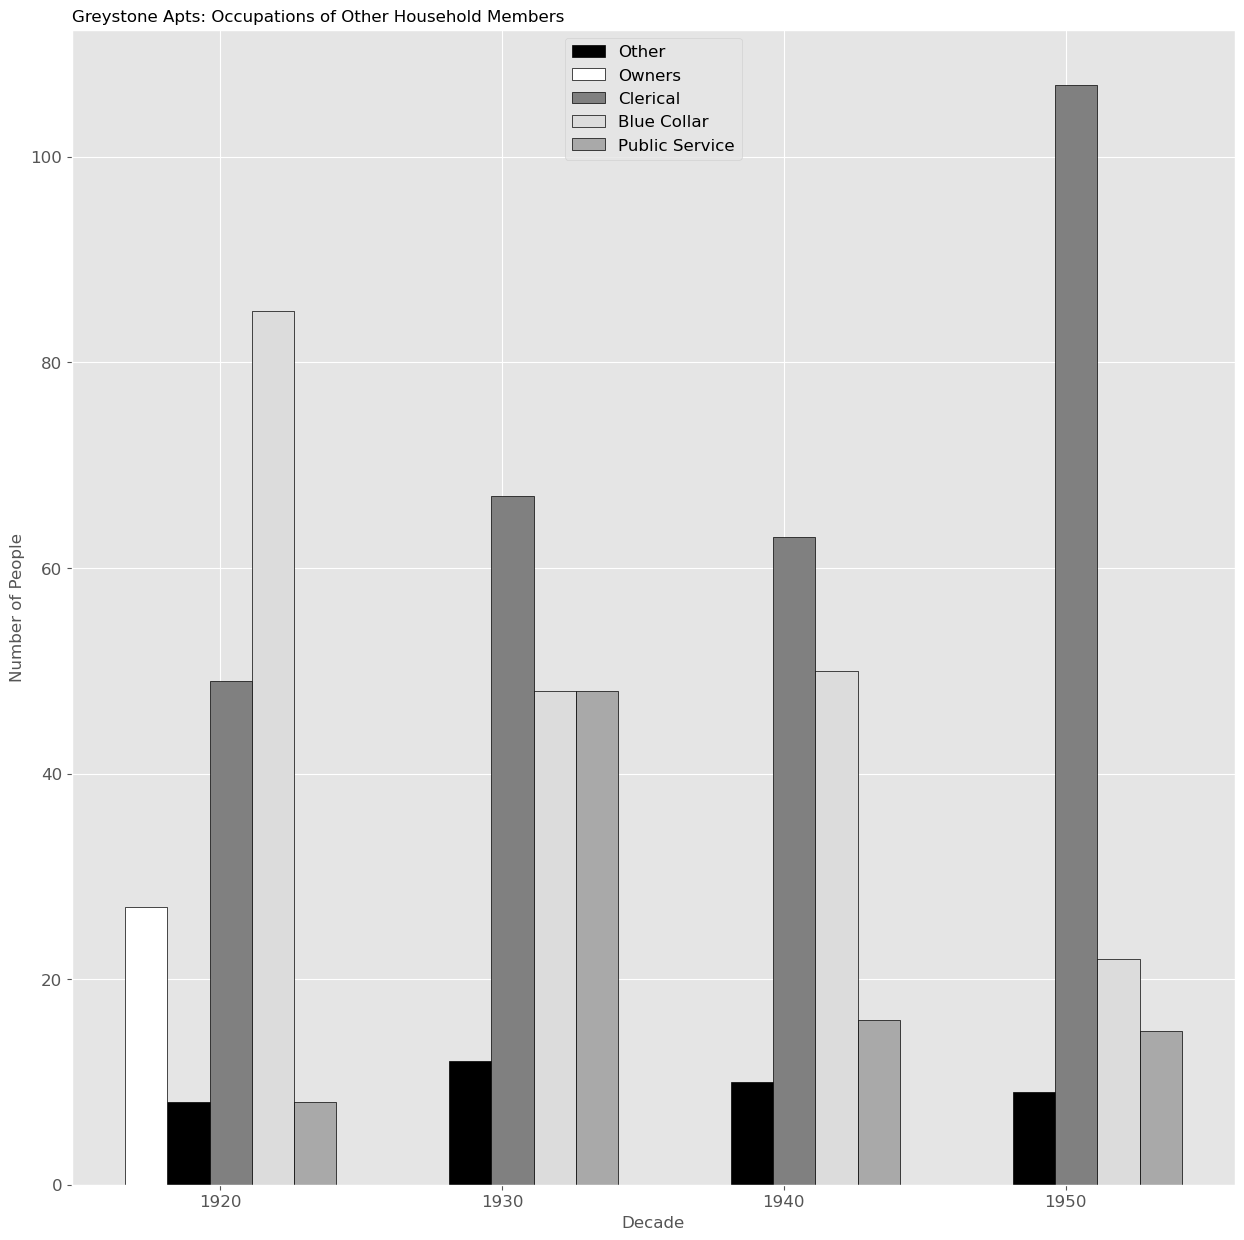

In [39]:
n=4
r = np.arange(n) 
width = 0.15
plt.figure(figsize=(15, 15))
plt.bar(r + width, df_demo_numbers['num_manage_other'],
        width = width, edgecolor = 'black', color='black',
        label='Other')

plt.bar(r, df_demo_numbers['num_owner_other'],
        width = width, edgecolor = 'black', color='white',
        label='Owners')

plt.bar(r + width*2, df_demo_numbers['num_cler_other'],
        width = width, edgecolor = 'black', color='gray',
        label='Clerical')

plt.bar(r + width*3, df_demo_numbers['num_blue_other'], 
        width = width, edgecolor = 'black', color='gainsboro',
        label='Blue Collar')

plt.bar(r + width*4, df_demo_numbers['num_pub_serv_other'], 
        width = width, edgecolor = 'black', color='darkgray',
        label='Public Service')

plt.xlabel('Decade', fontsize=12) 
plt.ylabel('Number of People', fontsize=12) 
plt.title(label='Greystone Apts: Occupations of Other Household Members', fontsize=12, loc='left') 

  
# plt.grid(linestyle='--') 
plt.xticks(r + (width*1.75),['1920', '1930', '1940', '1950'], fontsize=12) 
plt.yticks(fontsize=12)
plt.legend(loc='upper center', fontsize=12)
  
plt.show()  

In [19]:
display(df_rent.head())
df_rent.info()


,year,rent_less_30,rent_30_34,rent_35_39,rent_40_44,rent_45_49,rent_50_54,rent_55_59,rent_60_64,rent_65_69,rent_70_84,rent_85_100,rent_80_84,rent_greater_100,rent_unknown
0,1930,0,0,0,7,0,0,1,1,4,6,2,0,1,0
1,1940,7,3,1,2,14,18,13,9,11,2,1,0,0,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   year              2 non-null      int64
 1   rent_less_30      2 non-null      int64
 2   rent_30_34        2 non-null      int64
 3   rent_35_39        2 non-null      int64
 4   rent_40_44        2 non-null      int64
 5   rent_45_49        2 non-null      int64
 6   rent_50_54        2 non-null      int64
 7   rent_55_59        2 non-null      int64
 8   rent_60_64        2 non-null      int64
 9   rent_65_69        2 non-null      int64
 10  rent_70_84        2 non-null      int64
 11  rent_85_100       2 non-null      int64
 12  rent_80_84        2 non-null      int64
 13  rent_greater_100  2 non-null      int64
 14  rent_unknown      2 non-null      int64
dtypes: int64(15)
memory usage: 372.0 bytes


In [43]:
#df_rent['year'] = df_rent['year'].astype(int)
columns_for_y = ['0-30', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '85-100', '80-84', '>100', 'rent_unknown']

#df_rent_pivot = pd.wide_to_long(df_rent, ["A", "B"], i="id", j="year")
#display(df_rent_pivot)

In [44]:
columns = ['1930', '1940']
df_rent_mod = pd.DataFrame(columns=columns)

#df_rent.set_index('year', inplace=True)

value_list_1930 = []
value_list_1940 = []

value_list_1930 = df_rent.iloc[0, 1:14].values
value_list_1940 = df_rent.iloc[1, 1:14].values

result_1930 = [s for s, n in zip(columns_for_y, value_list_1930) for _ in range(n)]
result_1940 = [s for s, n in zip(columns_for_y, value_list_1940) for _ in range(n)]

max_length = max(len(result_1930), len(result_1940))
result_1930 += ['none'] * (max_length - len(result_1930))
result_1940 += ['none'] * (max_length - len(result_1940))

df_rent_mod['1930'] = result_1930
df_rent_mod['1940'] = result_1940

display(df_rent_mod.head(10))
df_rent_mod.info()



,1930,1940
0,40-44,0-30
1,40-44,0-30
2,40-44,0-30
3,40-44,0-30
4,40-44,0-30
5,40-44,0-30
6,40-44,0-30
7,55-59,30-34
8,60-64,30-34
9,65-69,30-34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1930    81 non-null     object
 1   1940    81 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


,rent_cost,count
0,40-44,7
1,55-59,1
2,60-64,1
3,65-69,4
4,70-74,6
5,85-100,2
6,>100,1
7,none,59


,rent_cost,count
0,0-30,7
1,30-34,3
2,35-39,1
3,40-44,2
4,45-49,14
5,50-54,18
6,55-59,13
7,60-64,9
8,65-69,11
9,70-74,2


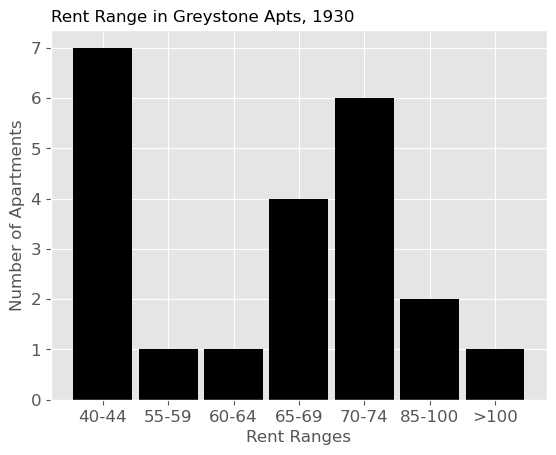

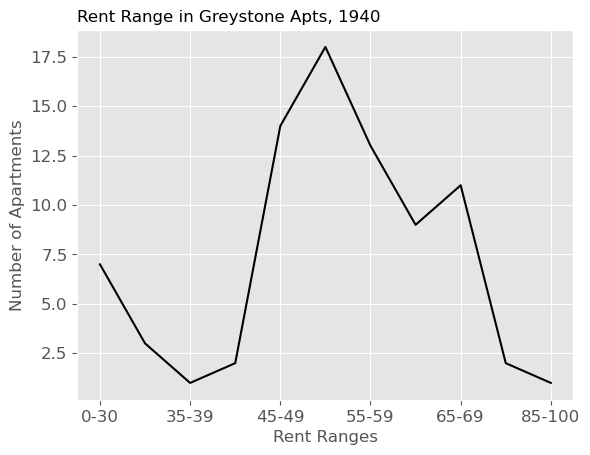

In [45]:
df_1930 = df_rent_mod.groupby('1930').count().sort_values(by='1930', ascending=True).reset_index().rename(columns={'1930': 'rent_cost', '1940': 'count'}) 
df_1940 = df_rent_mod.groupby('1940').count().sort_values(by='1940', ascending=True).reset_index().rename(columns={'1940': 'rent_cost', '1930': 'count'}) 

display(df_1930)
display(df_1940)

df_1930 = df_1930.drop(df_1930.index[7])

x_1930 = df_1930['rent_cost']
y_1930 = df_1930['count']

bar_width = 0.9 

plt.bar(x_1930, y_1930, width=bar_width, color='black')

plt.xlabel('Rent Ranges', fontsize=12)
plt.ylabel('Number of Apartments', fontsize=12)
plt.title('Rent Range in Greystone Apts, 1930', fontsize=12, loc='left')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# Show the plot
plt.show()
df_1940.plot(kind='line',
             x='rent_cost',
             y='count',
             color='black',
             legend=False)

plt.title('Rent Range in Greystone Apts, 1940', fontsize=12, loc='left')
plt.xlabel('Rent Ranges', fontsize=12)
plt.ylabel('Number of Apartments', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#remove word "rent", change to ">100, 85-100, 75-84" etc.


In [23]:
display(df_value.head())
df_value.info()

,year,value_2500,value_3000,value_3500,value_3500_2,value_4000,value_4500,value_5000,value_5500,value_6000,value_6500,value_7000,value_7500,value_8000
0,1940,5,5,14,3,6,7,2,7,5,5,5,2,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   year          1 non-null      int64
 1   value_2500    1 non-null      int64
 2   value_3000    1 non-null      int64
 3   value_3500    1 non-null      int64
 4   value_3500_2  1 non-null      int64
 5   value_4000    1 non-null      int64
 6   value_4500    1 non-null      int64
 7   value_5000    1 non-null      int64
 8   value_5500    1 non-null      int64
 9   value_6000    1 non-null      int64
 10  value_6500    1 non-null      int64
 11  value_7000    1 non-null      int64
 12  value_7500    1 non-null      int64
 13  value_8000    1 non-null      int64
dtypes: int64(14)
memory usage: 244.0 bytes


In [24]:
columns = ['1940']
df_value_mod = pd.DataFrame(columns=columns)

value_columns_for_y = ['2500', '3000', '3500', '3500(2)', '4000', '4500', '5000', '5500', '6000', '6500', '7000', '7500', '8000']
#df_rent.set_index('year', inplace=True)

#new_value_list_1930 = []
new_value_list_1940 = []

#new_value_list_1930 = df_value.iloc[0, 1:13].values
new_value_list_1940 = df_value.iloc[0, 1:13].values

#new_result_1930 = [s for s, n in zip(columns_for_y, new_value_list_1930) for _ in range(n)]
new_result_1940 = [s for s, n in zip(value_columns_for_y, new_value_list_1940) for _ in range(n)]

'''max_length = max(len(new_result_1930), len(new_result_1940))
new_result_1930 += ['none'] * (max_length - len(new_result_1930))
new_result_1940 += ['none'] * (max_length - len(new_result_1940))

df_value_mod['1930'] = new_result_1930'''
df_value_mod['1940'] = new_result_1940

display(df_value_mod.head(10))
df_value_mod.info()

,1940
0,2500
1,2500
2,2500
3,2500
4,2500
5,3000
6,3000
7,3000
8,3000
9,3000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1940    66 non-null     object
dtypes: object(1)
memory usage: 660.0+ bytes


,value_range,count
0,3500,14
1,4500,7
2,5500,7
3,4000,6
4,2500,5


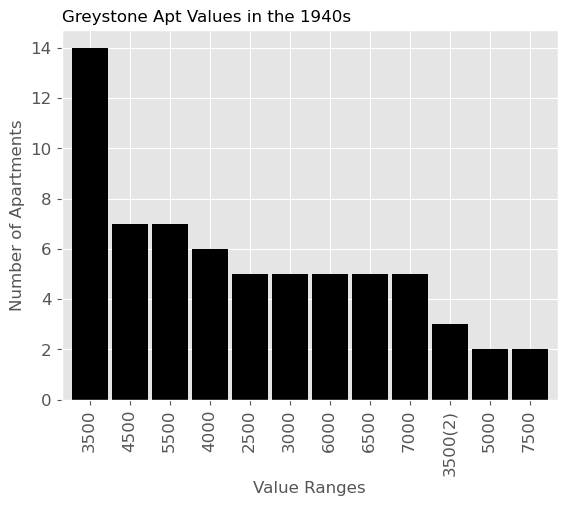

In [25]:
df_value_1940 = df_value_mod.value_counts().reset_index().rename(columns={'1940': 'value_range', '1930': 'count'}) 

display(df_value_1940.head())

df_value_1940.plot(kind='bar',
             x='value_range',
             y='count',
             width=0.9,
             color='black',
             legend=False)
plt.title('Greystone Apt Values in the 1940s', fontsize=12, loc='left')
plt.xlabel('Value Ranges', fontsize=12)
plt.ylabel('Number of Apartments', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [26]:
display(df_edu_inc)

,who,eight_or_less,some_high_school,completed_high_school,some_college,completed_college,post_graduate,less_1000_income,1000_1999_income,2000_2499_income,2500_2999_income,3000_3499_income,3500_3999_income,4000_4499_income,4500_4999_income,5000_5499_income,unknown_other_income
0,head,14,8,37,7,20,4,2,22,15,9,4,1,4,4,5,16
1,other,32,22,46,13,17,1,16,13,4,0,1,0,0,0,2,0
